<a href="https://colab.research.google.com/github/VenkataramanSuriya/AI-Projects-that-I-have-done/blob/main/36_Improved_Fuel_Efficiency_Prediction_Using_TensorFlow_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **36. Improved Fuel Efficiency Prediction Using TensorFlow in Python**

**Installing And Importing All Other Libries**

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**Load the larger dataset**

In [ ]:
data = pd.read_csv("/content/auto-mpg.csv")

**Plot all data points in the dataset**

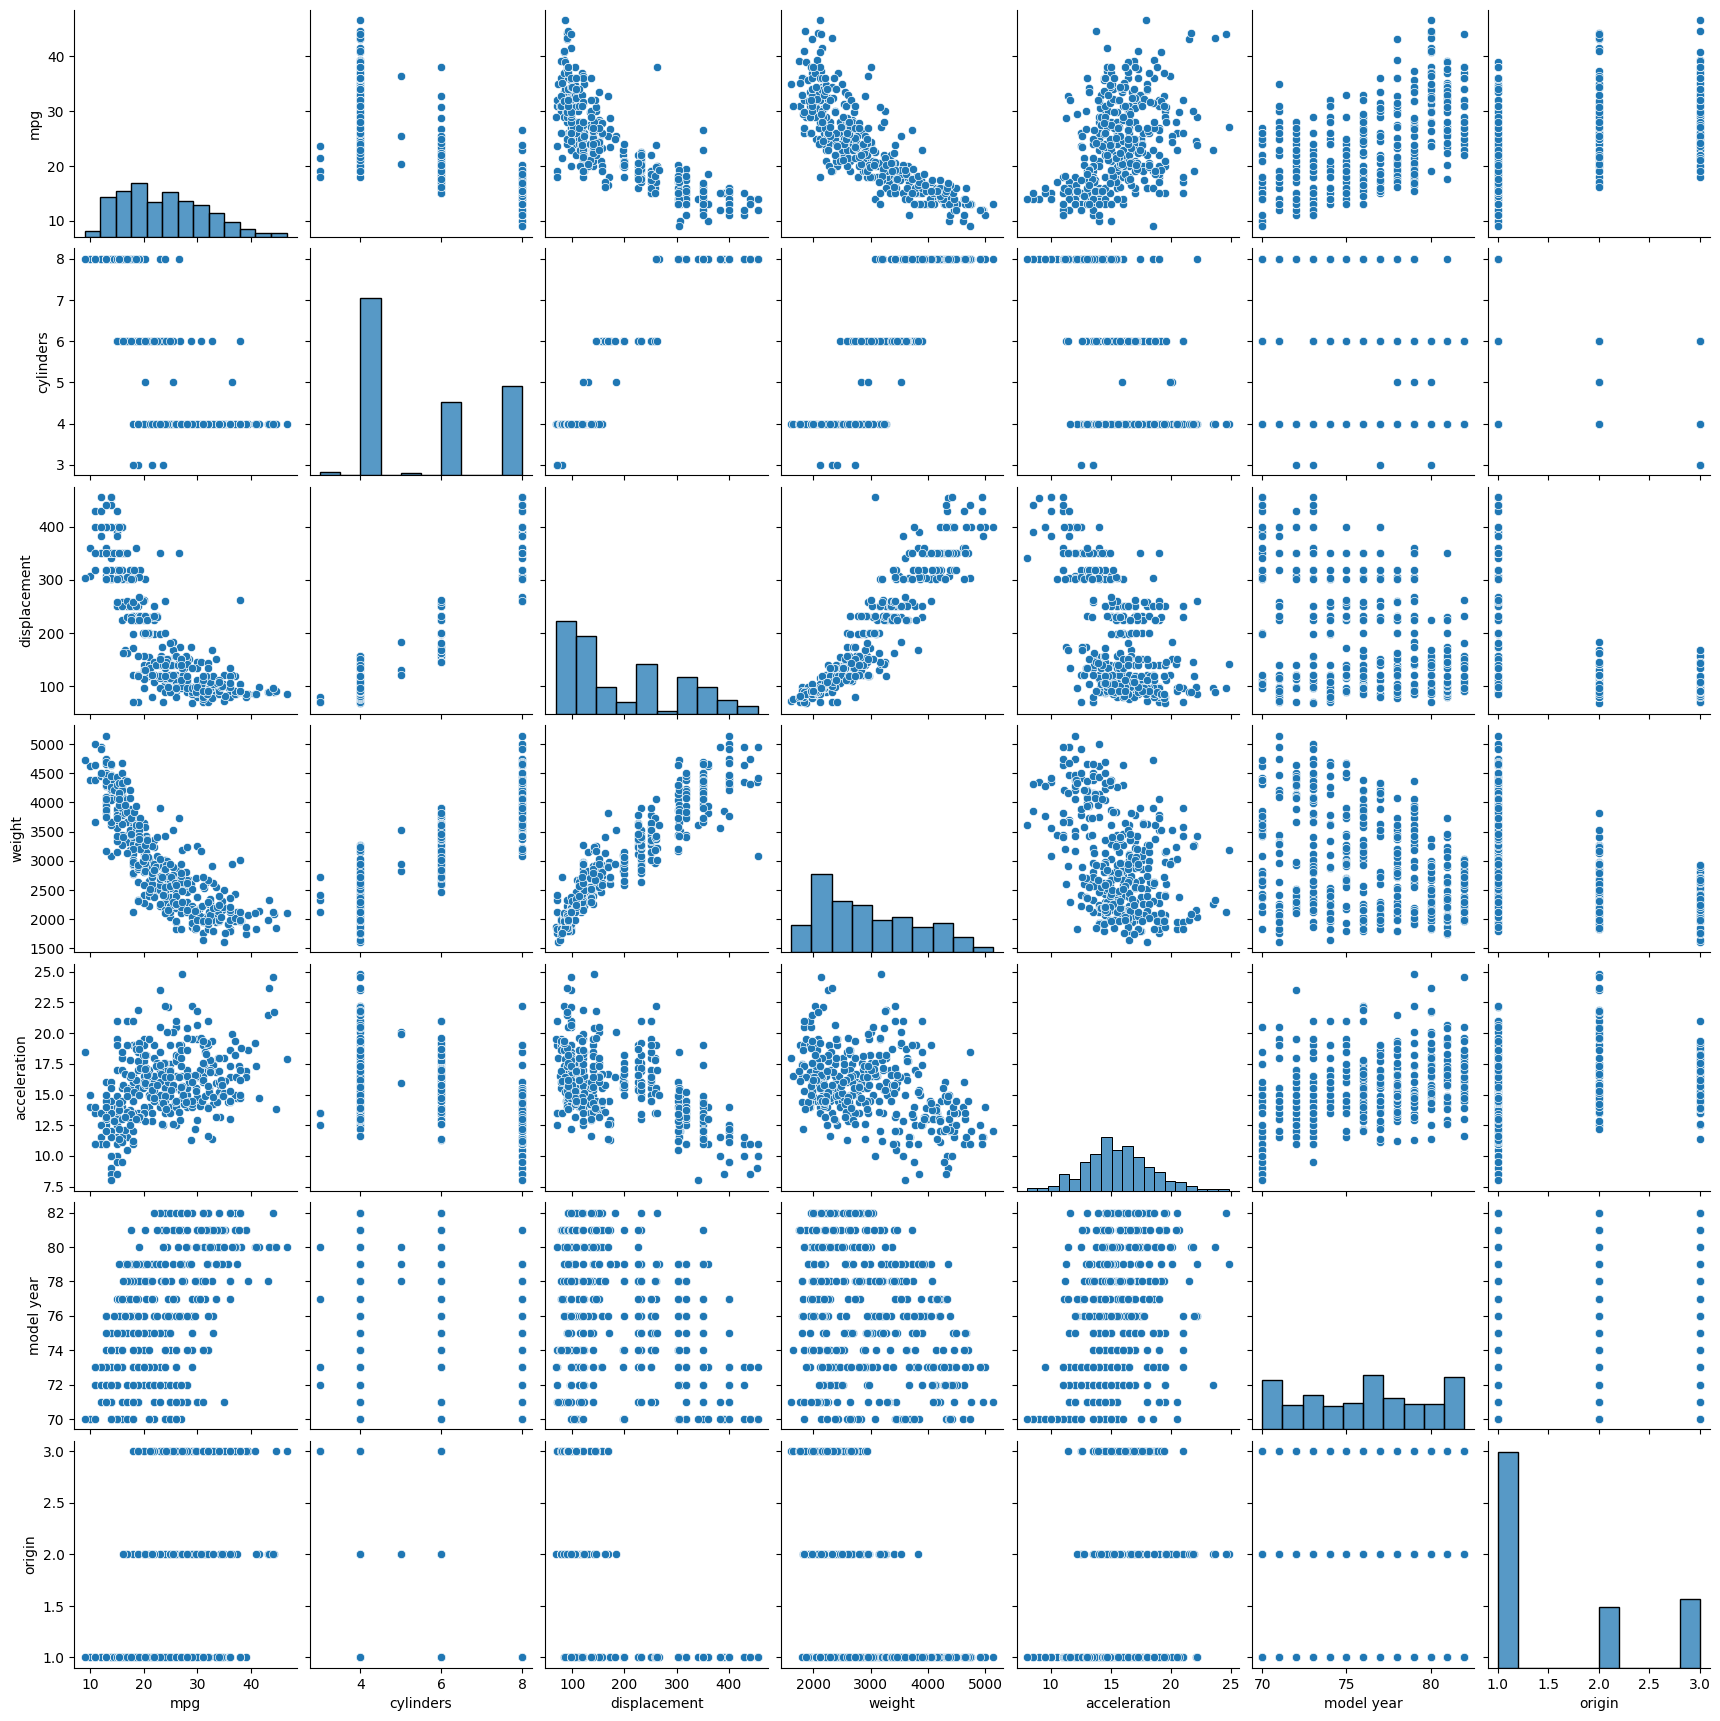

In [ ]:
sns.pairplot(data)
plt.show()

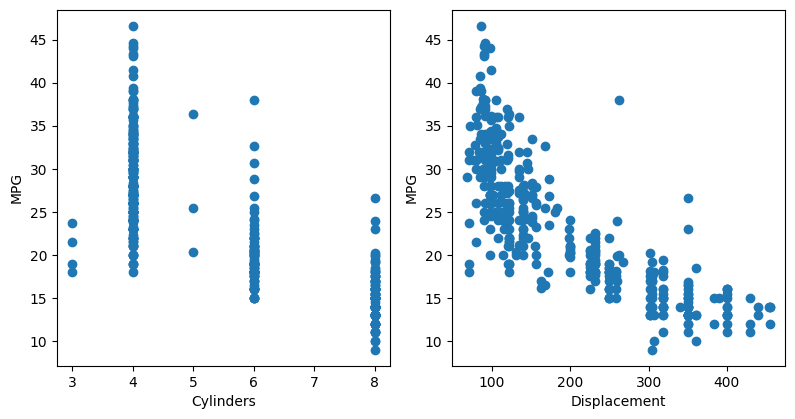

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(data['cylinders'], data['mpg'])
plt.xlabel('Cylinders')
plt.ylabel('MPG')

plt.subplot(2, 3, 2)
plt.scatter(data['displacement'], data['mpg'])
plt.xlabel('Displacement')
plt.ylabel('MPG')

plt.tight_layout()
plt.show()


**Display the information about the dataset**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


**Preprocessing: Handling missing values**

In [ ]:
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

**Dropping 'car name' column**

In [ ]:
data = data.drop(columns='car name')

**Separating target and features**

In [ ]:
target_column = 'mpg'
X = data.drop(columns=[target_column])
y = data[target_column]

**Check the number of samples after cleaning**

In [ ]:
print("Number of samples after cleaning:", len(data))

Number of samples after cleaning: 392


**Check if there are enough samples after cleaning**

In [ ]:
if len(data) < 50:
    print("Insufficient samples after data cleaning. Please check the dataset or data cleaning process.")

else:

    #  Splitting the data into training and testing sets


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the features by scaling


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Creating the model


    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training the model


    history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

    # Predicting on test set


    y_pred = model.predict(X_test_scaled)

    # Calculating MSE and R² score


    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R²) Score: {r2}")

Epoch 1/100
8/8 [==============================] - 1s 37ms/step - loss: 589.6057 - val_loss: 660.7353
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 573.3314 - val_loss: 641.4964
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 552.9152 - val_loss: 619.1815
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 531.6668 - val_loss: 592.6008
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 504.0123 - val_loss: 559.8681
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 469.7462 - val_loss: 520.5936
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 431.9569 - val_loss: 473.9842
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 388.6659 - val_loss: 420.4983
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 342.9917 - val_loss: 361.8893
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 287.2550 - val

**Plot train and test data**

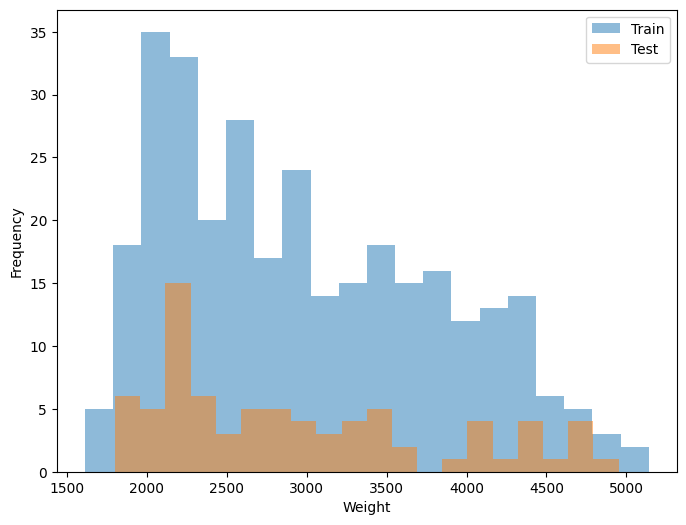

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(X_train['weight'], bins=20, alpha=0.5, label='Train')
plt.hist(X_test['weight'], bins=20, alpha=0.5, label='Test')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**Plot training efficiency of the model**

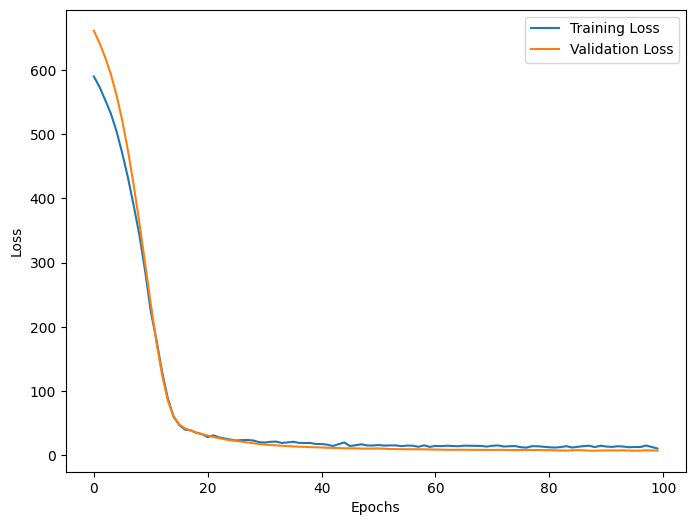

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Test the model and plot testing efficiency**

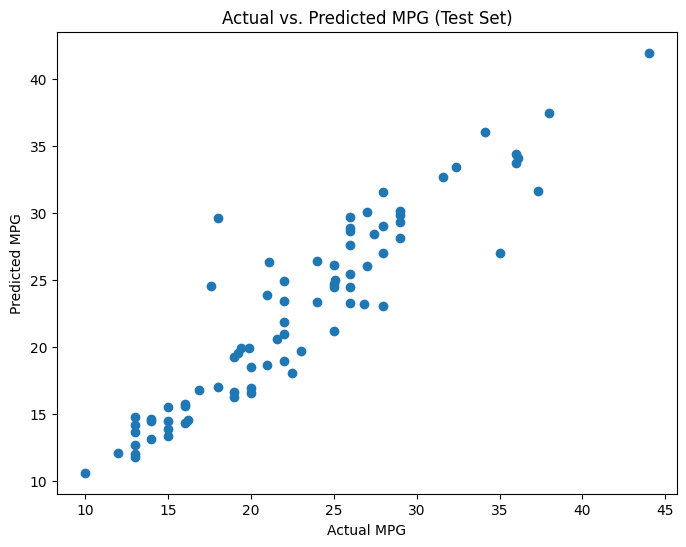

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs. Predicted MPG (Test Set)')
plt.show()


**Plot the overall efficiency of the model**

In [ ]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²) Score: {r2}")

Mean Squared Error (MSE): 7.385682869703946
R-squared (R²) Score: 0.8552978355479423


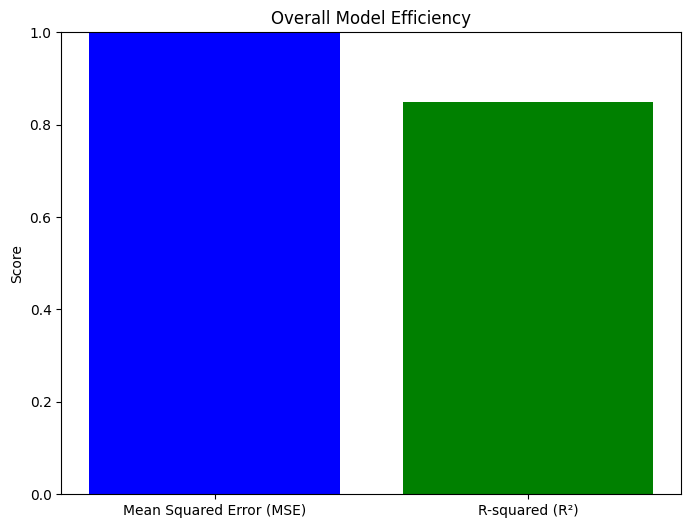

In [ ]:
mse = 7.38
r2 = 0.85

labels = ['Mean Squared Error (MSE)', 'R-squared (R²)']
values = [mse, r2]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Score')
plt.title('Overall Model Efficiency')
plt.ylim(0, 1)
plt.show()
